## Касьянов Семен. Вариант 9

## Задание
\
Для функции $|sin⁡2x + sin⁡x |$ провести интерполяцию на интервале [0,2π]. Сравнить тригонометрический полином, свободный сплайн 3 порядка и заданную функцию, построить графики решения на подробной сетке. Найти подходящий шаг интерполяции для обоих методов и выбрать наилучшую интерполяцию на основе нормы разности, рассчитанной на подробной сетке. Построить график максимальной ошибки от шага интерполяции. Протестировать функцию без модуля, найти подходящий шаг интерполяции, сравнить результаты.



In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Тригонометрическая интерполяция

Реализуем функцию, которая будет разбивать исследуемый нами отрезок на заданное количество точек

In [2]:
def point(start, stop, n):

    a = [start + i*stop / (n - 1) for i in range (n)]
    a = np.array(a)
    return a

Данная функций будет использоваться для нахождения значения функции в точках

In [3]:
def function(x):
    
    return abs(np.sin(x) + np.sin(2 * x))

Реализуем функцию, которая будет вычислять коэффициенты тригонометрического полинома в случае чётного количества точек сетки

In [4]:
def even(n):

    a = []
    b = []

    a0 = 0
    for i in range (2 * n + 1):
        a0 += function(2 * np.pi * i / (2 * n + 1))
    a0 = a0 / (2 * n + 1)
    

    for k in range (1, n + 1):

        ak = 0
        for i in range (1, 2 * n + 1):
            ak += function(2 * np.pi * i / (2 * n + 1)) * np.cos(k * 2 * np.pi * i / (2 * n + 1))
        ak = 2 * ak / (2 * n + 1)
        a.append(ak)

        bk = 0
        for i in range (1, 2 * n + 1):
            bk += function(2 * np.pi * i / (2 * n + 1)) * np.sin(k * 2 * np.pi * i / (2 * n + 1))
        bk = 2 * bk / (2 * n + 1)
        b.append(bk)

    return a0, a, b


Аналогичная функция вычисляет коэффициенты тригонометрического полинома в случае нечётного количества точек

In [5]:
def odd(n):
    
    a = []
    b = []

    a0 = 0
    for i in range (2 * n):
        a0 += function(np.pi * i / n) / n
    
    for k in range (1, n + 1):

        ak = 0
        for i in range (2 * n):
            ak += function(np.pi * i / n) * np.cos(k * np.pi * i / n) / n
        a.append(ak)

        bk = 0
        for i in range (2 * n):
            bk += function(np.pi * i / n) * np.sin(k * np.pi * i / n) / n
        b.append(bk)

    return a0, a, b

Данная функций осуществляет запрос одной из двух предыдущих (в зависимости от четности числа точек в разбиении отрезка) и получает коэффициенты полинома

In [6]:
def trig_polynom(n):

    if n % 2 == 0:
        a0, a, b = even(n)
        return a0, a, b
    else:
        a0, a, b = odd(n)
        return a0, a, b

Приведённая ниже функция непосредственно вычисляет значения интерполяции на продробной сетке

In [7]:
def interpolation(n, points):
    a0, a, b = trig_polynom(n)

    P = []
    
    if n % 2 == 0:
        for i in points:
            f = a0

            for k in range (n + 1):
                f += a[k - 1] * np.cos(k * i) + b[k - 1] * np.sin(k * i)
            P.append(f)
    
    else:
        for i in points:
            f = 0.5 * (a0 + a[-1] * np.cos(n * i))

            for k in range (n):
                f += a[k - 1] * np.cos(k * i) + b[k - 1] * np.sin(k * i)
            P.append(f)
        
    P = np.array(P)
    return P



Для поиска оптимального значения разбиения возьмём в качестве критерия максимальную разность значений функции и интерполяции, а в качестве значения - 0.04

In [ ]:
err = 100
n = 2
while err > 0.04:
    points = point(0, np.pi * 2, 10000)
    y_real = function(points)
    y_pred = interpolation(n, points)
    err = max(abs(y_real - y_pred))
    print(err)
    n += 1
print(n)

Получаем, что при разбиении отрезка на 47 точек, мы достигаем необходимую точность

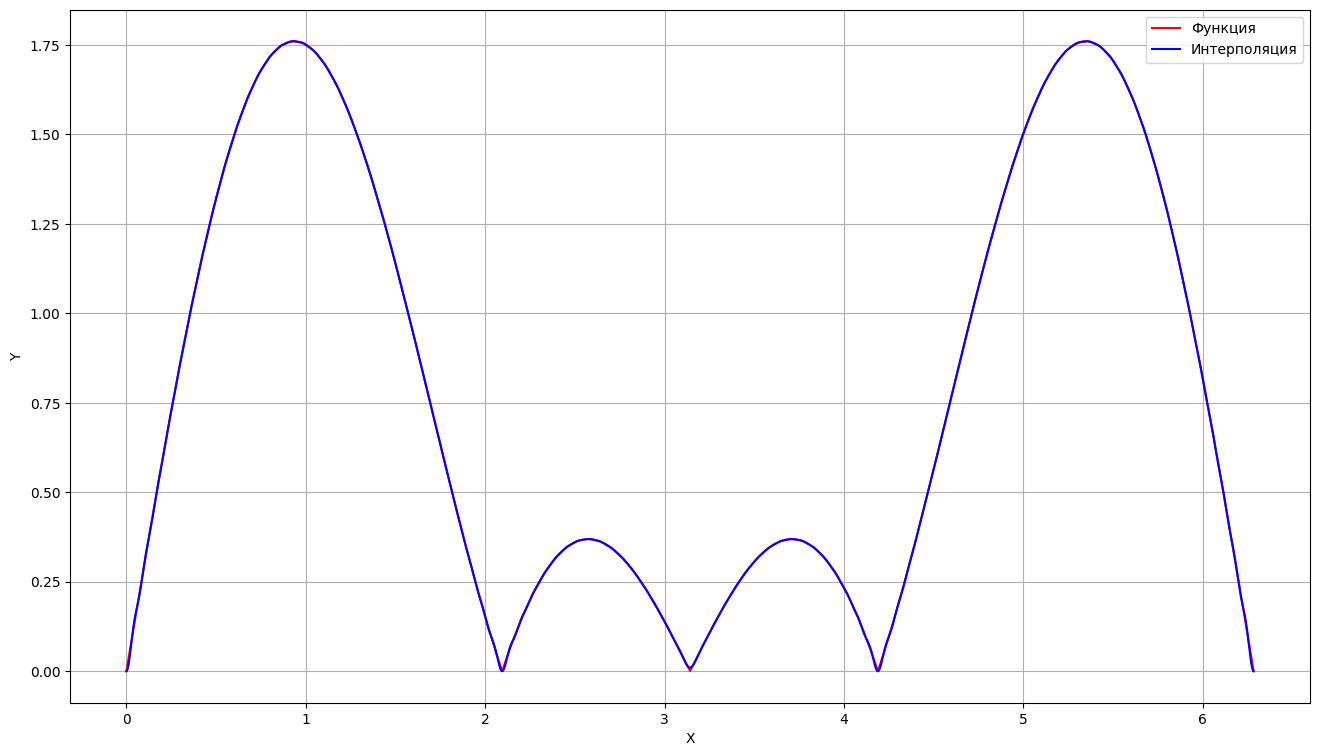

In [90]:
error = []
for n in range (4, 101):
    N = 10000
    points = point(0, np.pi * 2, N)
    y_real = function(points)
    y_pred = interpolation(n, points)
    error.append(max(abs(y_real - y_pred)))

fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(points, y_real, c = 'r', label = 'Функция')
plt.plot(points, y_pred, c = 'b', label = 'Интерполяция')
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

В качестве максимальной ошибки будем рассчитывать максимальное отклонение интерполяции от функции по модулю

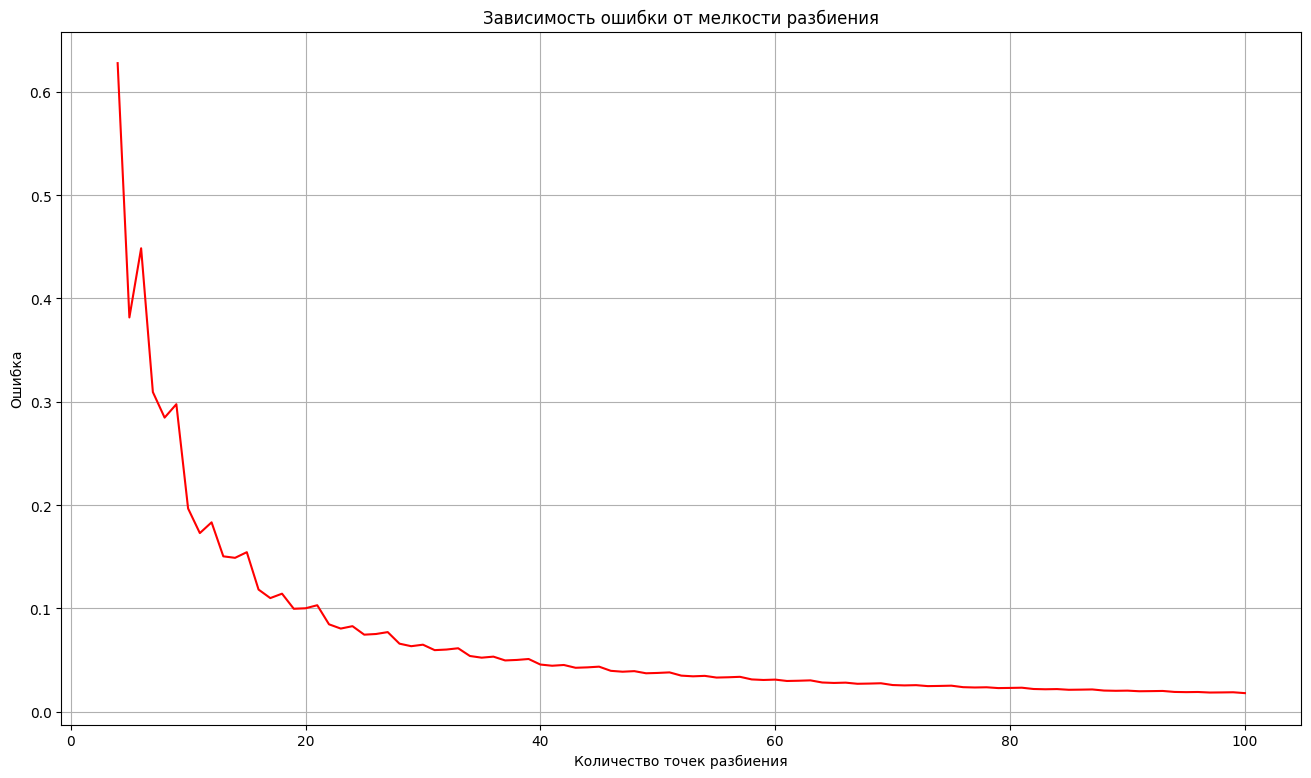

In [91]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.plot([i for i in range (4, 101)], error, c = 'r')
plt.grid()
plt.title('Зависимость ошибки от мелкости разбиения')
plt.xlabel('Количество точек разбиения')
plt.ylabel('Ошибка')
plt.show()

Максимальная ошибка при 100 итерациях составляет $0.018$

Далее "ломаем" функцию

1.1102230246251565e-15


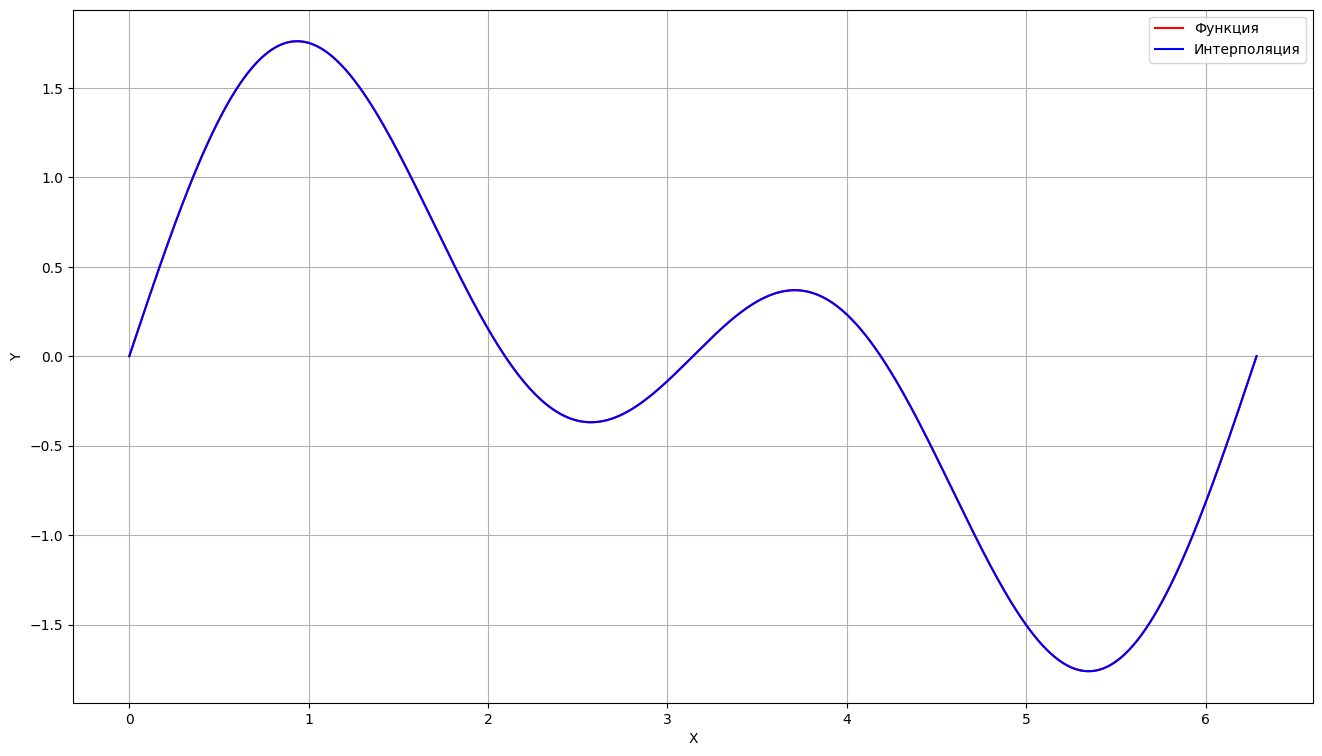

In [121]:
def function(x):
    
    return np.sin(x) + np.sin(2 * x)

n = 3
N = 10000
points = point(0, np.pi * 2, N)
y_real = function(points)
y_pred = interpolation(n, points)
print(max(abs(y_real - y_pred)))

fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(points, y_real, c = 'r', label = 'Функция')
plt.plot(points, y_pred, c = 'b', label = 'Интерполяция')
plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Разложением функции без модуля является сама функция, поэтому мы получаем такую точную интерполяцию

## Кубический сплайн

Данная функция строит матрицу для СЛАУ для поиска $c_{i}$

In [16]:
def matrix_c (n):
    A = np.zeros((n-2, n-2))

    for i in range (len(A)):
        A[i][i] = 2
    
    
    A[0][1] = 0.5
    A[-1][-2] = 0.5
    
    for i in range (1, len(A) - 1):
        A[i][i + 1] = 0.5
        A[i][i - 1] = 0.5

    return A

Данная функция реализует вычисление разделённых разностей 2-го порядка

In [17]:
def f_list(points, n):

    f = []
    for i in range (1, n - 1):

        f1 = (function(points[i]) - function(points[i - 1])) / (points[i] - points[i - 1])

        f2 = (function(points[i + 1]) - function(points[i])) / (points[i + 1] - points[i])
        
        f.append(6 * (f2 - f1) / (points[i + 1] - points [i - 1]))

    return np.array(f)

Данная функция решает СЛАУ и вычисляет $c_{1},..., c_{n-1}$

In [18]:
def solve_equation(A, f, n): 
    
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range (n):
        L[i][i] = 1

    for i in range (n):
        for j in range (n):
            if i <= j:
                sum = 0
                for k in range (i+1):
                    sum += L[i][k] * U[k][j]
                U[i][j] = A[i][j] - sum

            else:
                sum = 0
                for k in range (j+1):
                    sum += L[i][k] * U[k][j]
                L[i][j] = 1/U[j][j] * (A[i][j] - sum)

    y = np.zeros([n,1])
    y[0] = f[0]
    for i in range (1, n):
        sum = 0
        for j in range (i):
            sum += y[j]*L[i][j]
        y[i] = f[i] - sum

    x = np.zeros([n,1])
    x[n - 1] = y[n - 1]/U[n - 1][n - 1]
    for k in range (n - 2, -1, -1):
        sum = 0
        for j in range (k+1, n):
            sum += U[k][j] * x[j]
        x[k] = (1 / U[k][k]) * (y[k] - sum)

    return x

Данная функция находит коэффициенты $a, b, d$

In [19]:
def ABD(C, points):
    B = []
    A = []
    D = []
    for i in range (1, n):
        B.append(C[i] / 3 * 2 * np.pi / (n - 1) + C[i - 1] / 6 * 2 * np.pi / (n - 1) + ((function(points[i]) - function(points[i - 1])) / (points[i] - points[i - 1])))
        A.append(function(points[i]))
        D.append((C[i] - C[i - 1]) / (2 * np.pi / (n - 1)))
    return A, B, D

При вычислении значений интерполяции на подробной сетке функция ниже используется для нахождения ближайшей наибольшей точки, на которой происходило построение сплайна

In [20]:
def greater(i, points):
    res = next(x for x, val in enumerate(points) if val > i)
    return res

Ниже происходит вычисление значений интерполяции на подробной сетке

In [21]:
def y_predd(A, B, C, D, web, n):

    points = point(0, np.pi * 2, n)
    y_pred = []

    for i in web[0:len(web) - 1]:
        k = greater(i, points)
        y_pred.append(A[k - 1] + B[k - 1] * (i - points[k]) + C[k] * 0.5 * (i - points[k])**2 + D[k - 1] * (1 / 6) * (i - points[k])**3)
    y_pred.append(function(np.pi * 2))
    
    return np.array(y_pred)

In [33]:
err = 100
n = 5
while err > 0.04:
    points = point(0, np.pi * 2, n)
    web = point(0, np.pi * 2, 10000)
    y_real = function(web)

    A = matrix_c(n)
    f = f_list(points, n)

    # Решаем возникающее СЛАУ
    c = solve_equation(A, f, n - 2)
    C = [0]
    for i in range (len(c)):
        C.append(c[i][0])
    C.append(0)

    # Находим коэффициенты сплайнов
    A, B, D = ABD(C, points)

    # Строим функцию и интерполяцию на подробной сетке
    y_pred = y_predd(A, B, C, D, web, n)

    err = max(abs(y_real - y_pred))
    n += 1
print(n)

50


Получаем, что при разбиении отрезка на 50 точек, мы достигаем необходимую точность\
\
Таким образом, интерполяция тригонометрическим полином требует меньшего количества точек

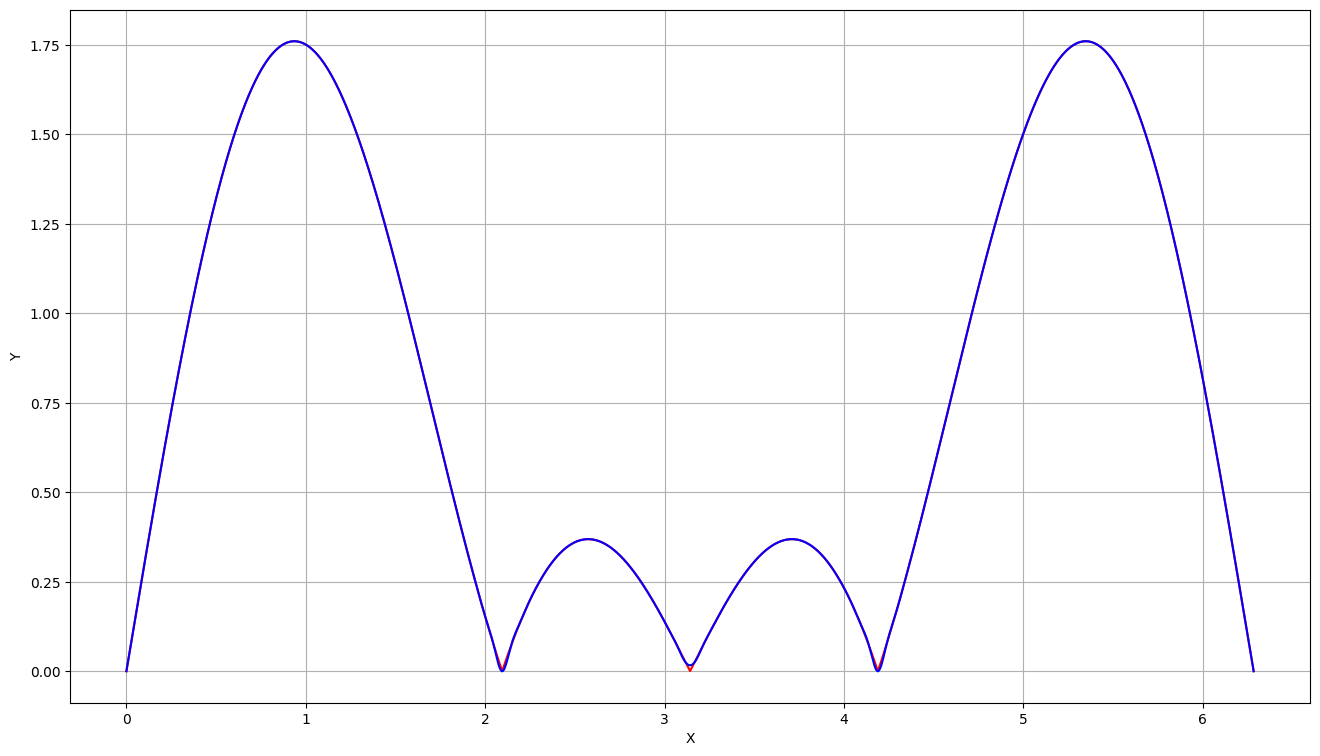

In [97]:
error = []
for n in range (4, 131):
    
    # Разбиваем отрезок на n точек
    points = point(0, np.pi * 2, n)

    # Строим матрицу для поиска c_i
    A = matrix_c(n)
    f = f_list(points, n)

    # Решаем возникающее СЛАУ
    c = solve_equation(A, f, n - 2)
    C = [0]
    for i in range (len(c)):
        C.append(c[i][0])
    C.append(0)

    # Находим коэффициенты сплайнов
    A, B, D = ABD(C, points)

    # Строим функцию и интерполяцию на подробной сетке
    web = point(0, np.pi * 2, 10000)
    y_pred = y_predd(A, B, C, D, web, n)
    y_real = function(web)
    error.append(max(abs(y_real - y_pred)))

fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(web, y_real, c = 'r', label = 'Функция')
plt.plot(web, y_pred, c = 'b', label = 'Интерполяция')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


На основании графика интерполяции можно заключить, что в качестве подходящего n можно принять значение примерно равно 130

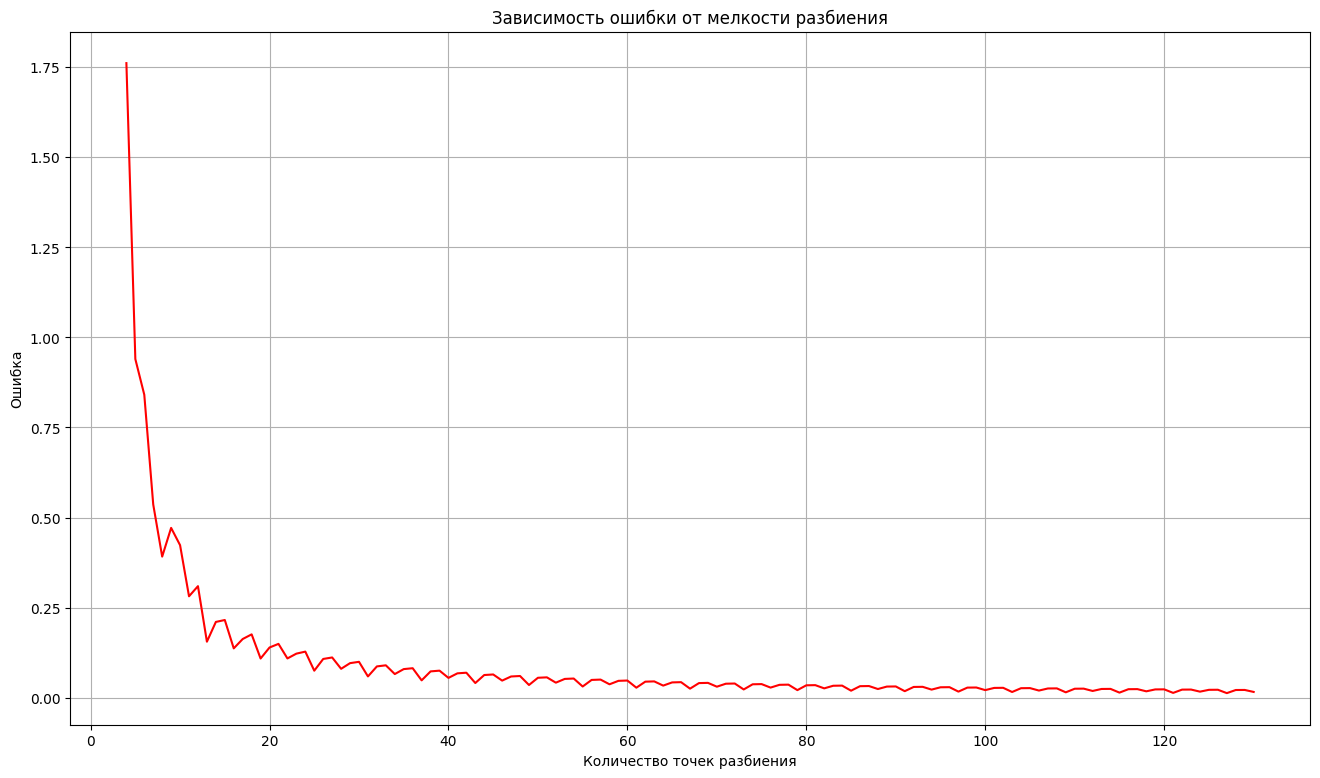

In [98]:
fig, ax = plt.subplots(figsize = (16, 9))
plt.plot([i for i in range (4, 131)], error, c = 'r')
plt.grid()
plt.title('Зависимость ошибки от мелкости разбиения')
plt.xlabel('Количество точек разбиения')
plt.ylabel('Ошибка')
plt.show()

Максимальная ошибка при 130 итерациях составляет $0.0163$

На основании этого можно заключить, что интерполяция кубическим сплайном является более подходящей

Далее "ломаем функцию"

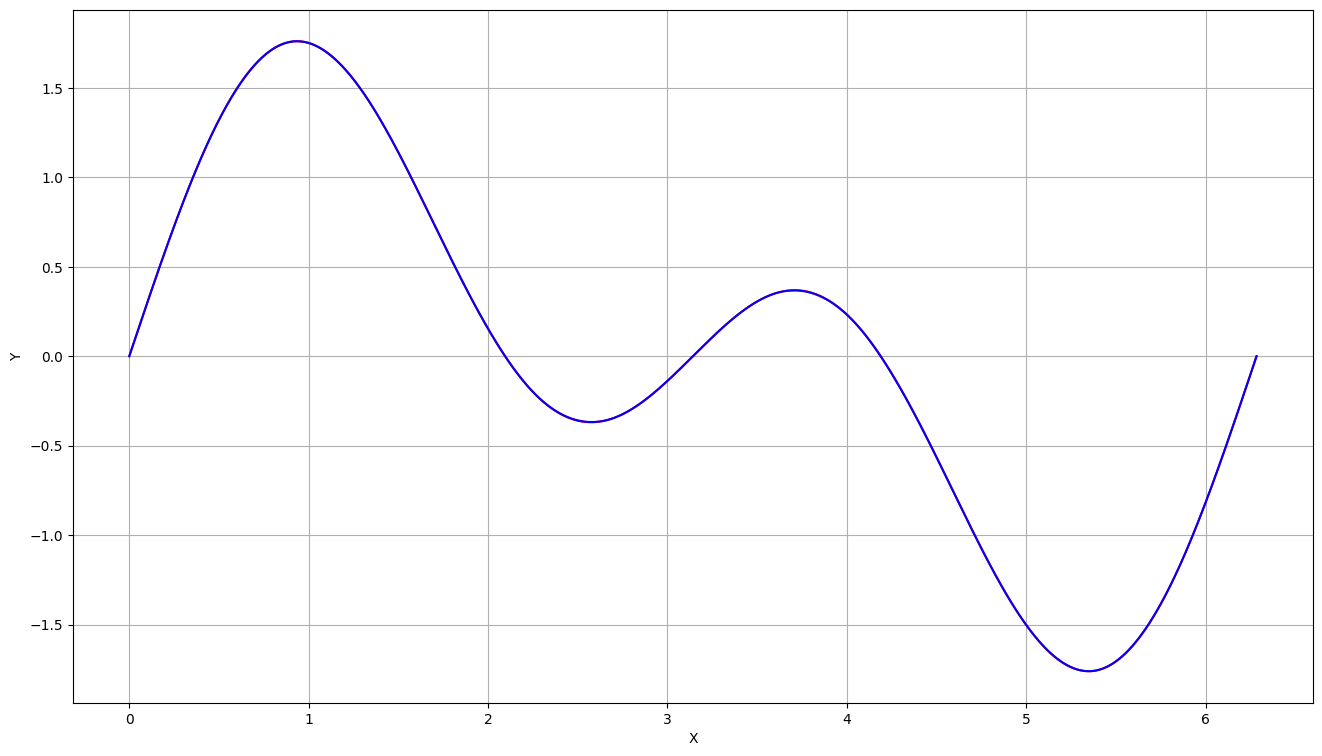

In [123]:
def function(x):
    
    return np.sin(x) + np.sin(2 * x)

n = 15
points = point(0, np.pi * 2, n)

# Строим матрицу для поиска c_i
A = matrix_c(n)
f = f_list(points, n)

# Решаем возникающее СЛАУ
c = solve_equation(A, f, n - 2)
C = [0]
for i in range (len(c)):
    C.append(c[i][0])
C.append(0)

# Находим коэффициенты сплайнов
A, B, D = ABD(C, points)

# Строим функцию и интерполяцию на подробной сетке
web = point(0, np.pi * 2, 10000)
y_pred = y_predd(A, B, C, D, web, n)
y_real = function(web)

fig, ax = plt.subplots(figsize = (16, 9))
plt.plot(web, y_real, c = 'r', label = 'Функция')
plt.plot(web, y_pred, c = 'b', label = 'Интерполяция')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Можно увидеть, что уже при n = 15 на графике не видно различий между интерполяцией и функцией \
\
Конечно же, более точной является интерполяция тригонометрическим полиномом, так как функция является полиномом самой себя